# VISUALIZING EARNINGS BASED ON COLLEGE MAJORS
In this project, I'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012.

The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. 
The dataset was cleaned by FiveThirtyEight an released on [Github](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row represents a different major in college and contains infomation on gender diversity, employment rates, median salaries, etc

Some of the columns in the dataset include:
 - Rank: Rank by median earnings (the dataset is ordered by this column).
 - Major_code: Major code.
 - Major: Major description.
 - Major_category: Category of major.
 - Total: Total number of people with major.
 - Sample_size: Sample size (unweighted) of full-time.
 - Men: Male graduates.
 - Women: Female graduates.
 - ShareWomen: Women as share of total.
 - Employed: Number employed.
 - Median: Median salary of full-time, year-round workers.
 - Low_wage_jobs: Number in low-wage service jobs.
 - Full_time: Number employed 35 hours or more.
 - Part_time: Number employed less than 35 hours.


### Introduction
Visualizations will help in explorations such as:
- Using scatter plots to determine whether students in more popular majors make more money
- Using histograms to find how many majors are predominantly male and female
- Using bar plots to determine the category of majors with most students


In [1]:
#importing pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt

#for plots to  be displays inline within Jupyter:
%matplotlib inline


In [2]:
#reading the dataframe
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Next, I'll create a function to explore the data, and pass in the dataset as the parameter.

In [3]:
#data exploration function:
def data_exploration(df):
    print("First row:\n", df.iloc[0],"\n")
    print("First 5 records:\n", df.head(), "\n")
    print("Last 5 records:\n", df.tail(), "\n")
    print("Summary statistics:\n", df.describe())
    
data_exploration(recent_grads)

First row:
 Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

From the descriptive statistics, the following are some of the observations drawn:
- The mean of the unemployment rate form the dataset is  approximately 0.068, with the mean of the unemployed is approximately 2416
- The mean of the employed is 31192, which is 92% more than the mean of the unemployed people in the dataset, for all the majors.
- Some records have missing values, as some counts are less than the total rows, 173

We'll therefore drop the rows with missing values so that all the columns have matching lengths.


In [4]:
#number of rows in the dataset
raw_data_count = len(recent_grads)
print("No. of rows:",raw_data_count)


No. of rows: 173


Dropping the rows with missing values:

In [5]:
recent_grads = recent_grads.dropna()
#count of remaining rows
cleaned_data_count = len(recent_grads)
print("No. of remaining rows:",cleaned_data_count)

No. of remaining rows: 172


Only one row has been dropped from the initial dataset

### Scatter Plots
Most plotting functionalities in pandas are within the df.plot() method.
 We can therefore specify the data to be plotted and use the 'kind' parameter to specify the type of plot, eg kind = 'scatter'

We'll therefore generate several scatter plots to explore various relations:


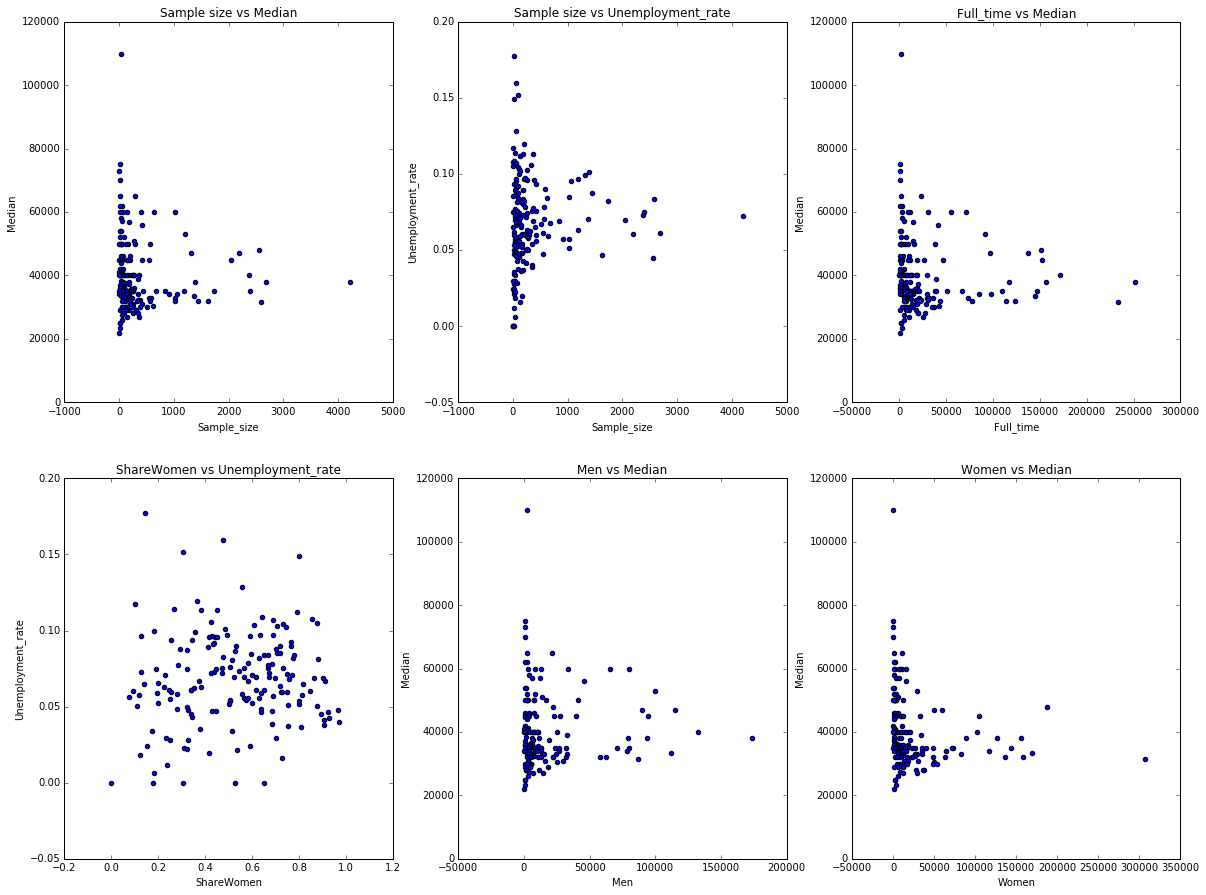

In [6]:
fig, axes = plt.subplots(nrows = 2,ncols = 3, figsize = (20,15))

ax1 = recent_grads.plot(ax = axes[0,0], x='Sample_size', y = 'Median', kind = 'scatter', 
                  title = 'Sample size vs Median')
ax2 = recent_grads.plot(ax = axes[0,1], x='Sample_size', y = 'Unemployment_rate', kind = 'scatter', 
                  title = 'Sample size vs Unemployment_rate')
ax3 = recent_grads.plot(ax = axes[0,2], x='Full_time', y = 'Median', kind = 'scatter', 
                  title = 'Full_time vs Median')
ax4 = recent_grads.plot(ax = axes[1,0], x='ShareWomen', y = 'Unemployment_rate', kind = 'scatter', 
                  title = 'ShareWomen vs Unemployment_rate')
ax5 = recent_grads.plot(ax = axes[1,1], x='Men', y = 'Median', kind = 'scatter', 
                  title = 'Men vs Median')
ax6 = recent_grads.plot(ax = axes[1,2], x='Women', y = 'Median', kind = 'scatter', 
                  title = 'Women vs Median')
plt.show()

It is noticeable from the scatter plots that ShareWomen,(women as share of total) and the Unemployment are uncorrelated, 
The median and sample size display weak positive correlation

To answer the questions:-
1. Do students in more popular majors make more money?
2. Do students that majored in subjects that were majority female make more money?
3. Is there any link between the number of full-time employees and median salary?

We'll generate the necessary scatter plots and make observations

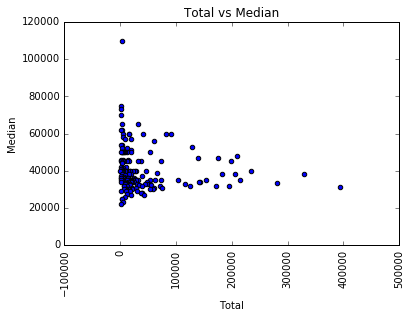

In [7]:
#scatter plot of median salary vs total number of people with major
ax7 = recent_grads.plot( x='Total', y = 'Median', kind = 'scatter', 
                  title = 'Total vs Median')
plt.xticks(rotation = 90)
plt.show()

The plot does not give enough evidence of correlation(relationship) between total number of students with majors and the median salary.


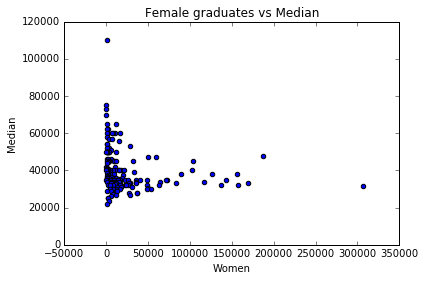

In [8]:
#plot of female graduates against the median salaries
ax8 = recent_grads.plot( x='Women', y = 'Median', kind = 'scatter', 
                  title = 'Female graduates vs Median')
#plt.xticks(rotation = 90)
plt.show()

There is only a vague relationship between female graduates and the median salaries, therefore,it is not enough to establish whether students that majored in subjects that were majority female make more money.

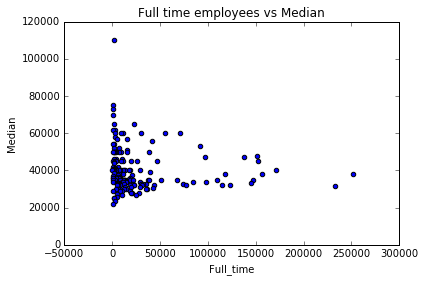

In [9]:
#plot of full-time employees against median salaries
ax9 = recent_grads.plot( x='Full_time', y = 'Median', kind = 'scatter', 
                  title = 'Full time employees vs Median')
#plt.xticks(rotation = 90)
plt.show()

There is no correlation between number of full time employees and median salaries

### Histograms
A **histogram** shows the underlying frequency distribution of a set of continuous data, thus displaying the distibution(eg, normal distribution) of the data
We'll generate various histograms to explore distributions of some of the columns

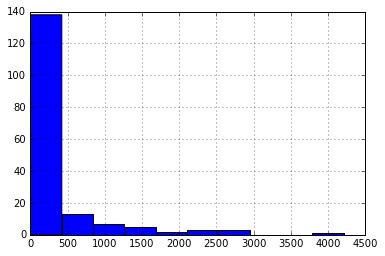

In [10]:
# histogram of sample size
hist1 = recent_grads['Sample_size'].hist()
plt.show()

The values of the sample size column are skewed to the right, therefore the relationship between the mean, median and mode is:
    
    mode < median < mean
This means that the most occuring values, mode, is to the far left of the plot

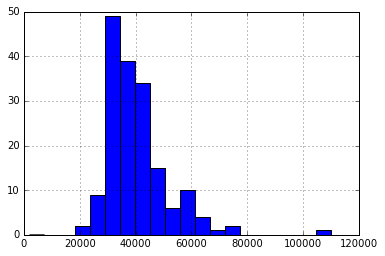

In [11]:
# histogram of median salaries
hist2 = recent_grads['Median'].hist(bins = 20, range = (2000,110000))
plt.show()

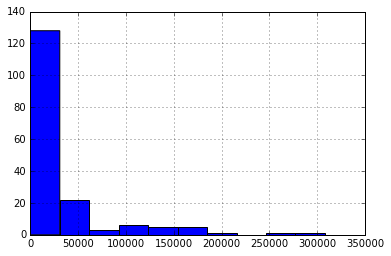

In [12]:
# histogram of employed students
hist3 = recent_grads['Employed'].hist()
plt.show()

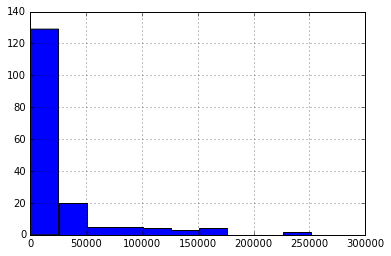

In [13]:
# histogram of full time employees
hist4 = recent_grads['Full_time'].hist()
plt.show()

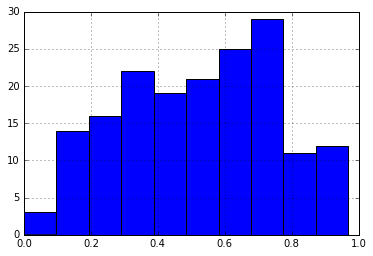

In [14]:
# histogram of Share women
hist5 = recent_grads['ShareWomen'].hist()
plt.show()

The plot does not show a defined distribution.

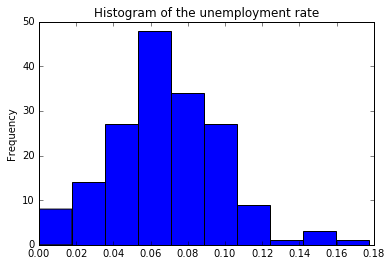

In [15]:
hist6 = recent_grads['Unemployment_rate'].plot(kind = 'hist',title = 'Histogram of the unemployment rate')
plt.show()

The unemployment rate is almost normally distributed.

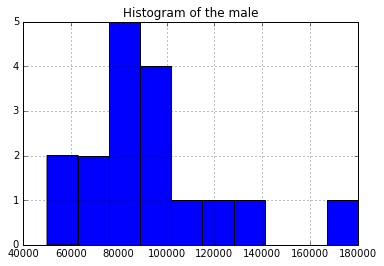

In [16]:
hist7 = recent_grads['Men'].hist(range = (50000,180000))
hist7.set_title("Histogram of the male")
plt.show()

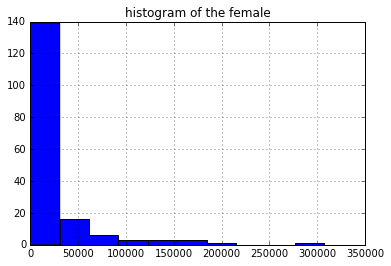

In [17]:
hist8 = recent_grads['Women'].hist()
hist8.set_title('histogram of the female')
plt.show()

**Brief Summary**

Most of the values of the columns are skewed to the right, with the unemployment rate showing a normal distribution.

### Scatter Matrix Plot
A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously.

The function used for such plots is scatter_matrix()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ed09ac748>,
      dtype=object)

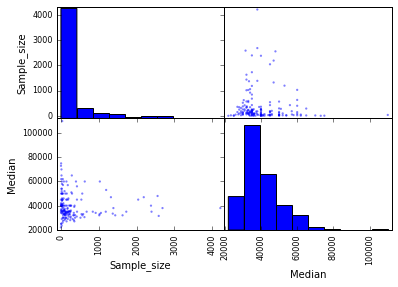

In [18]:
#importing the scatter_matrix() function
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size','Median']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eceb83eb8>,
      dtype=object)

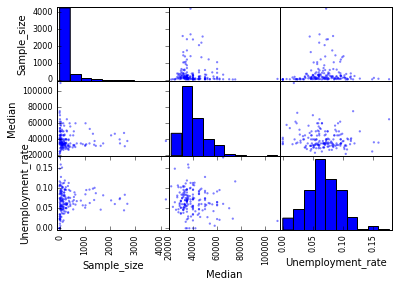

In [19]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']])

### Bar Plots


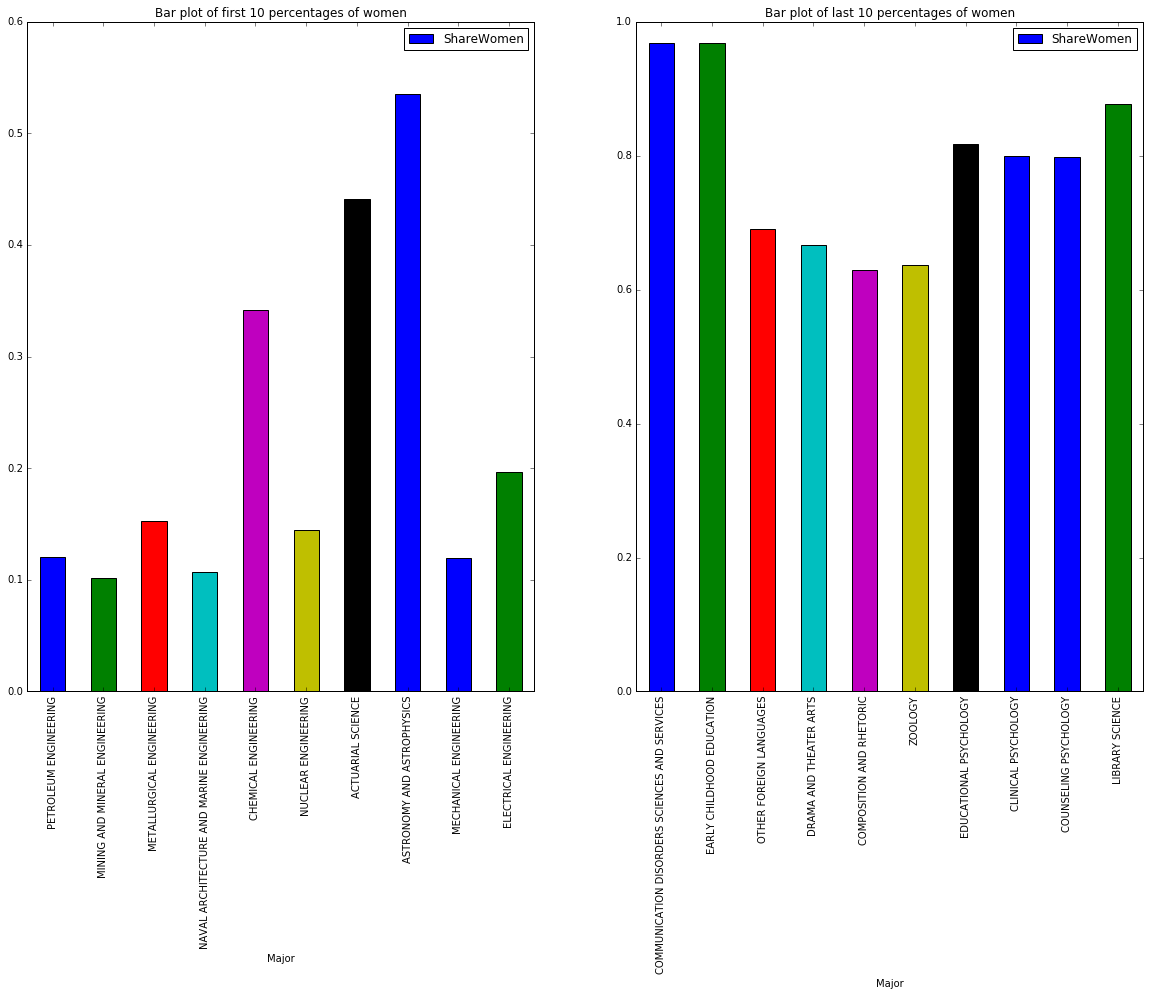

In [20]:
#Comparing percentages of women
fig= plt.figure( figsize = (20,12))
ax1 =fig.add_subplot(1,2,1)
ax2 =fig.add_subplot(1,2,2)

recent_grads[:10].plot(ax = ax1,kind = 'bar',x='Major', y='ShareWomen',
                       title = 'Bar plot of first 10 percentages of women')

recent_grads[-10:].plot(ax = ax2,kind = 'bar',x='Major', y='ShareWomen',
                       title = 'Bar plot of last 10 percentages of women')

plt.show()

**Observations**

- From the first 10 records, majors such as Actuarial Science and Astronomy and Astrophysics have a high percentage of women.

- From the last 10 records, the percentages of women in all the majors are relatively high, that is, above 0.4

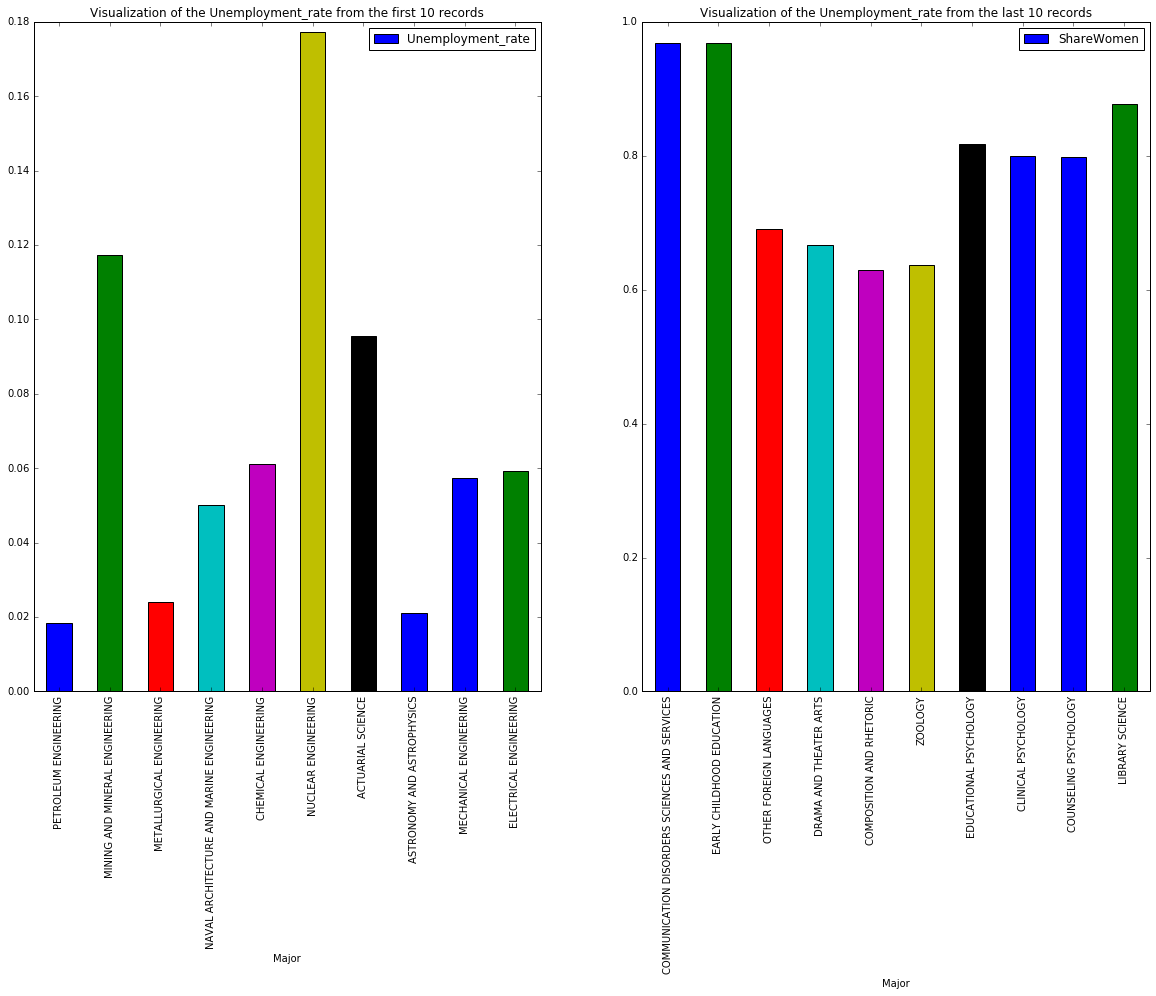

In [21]:
#Comparing Unemployment rate
fig= plt.figure( figsize = (20,12))
ax1 =fig.add_subplot(1,2,1)
ax2 =fig.add_subplot(1,2,2)

recent_grads[:10].plot(ax = ax1,kind = 'bar',x='Major', y='Unemployment_rate',
                       title = 'Visualization of the Unemployment_rate from the first 10 records')

recent_grads[-10:].plot(ax = ax2,kind = 'bar',x='Major', y='ShareWomen',
                       title = 'Visualization of the Unemployment_rate from the last 10 records')

plt.show()

**Observation**
- From the first 10 records, Nuclear Engineering, and Mining and Mineral Engineering seem to have the highest Uneployment rate.
However, from the last records, almost all the Majors have high enmployment rates, of above 0.6

### Grouped bar plots
We'll generate a grouped bar plot to compare the number of men with the number of women in each category of majors.

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



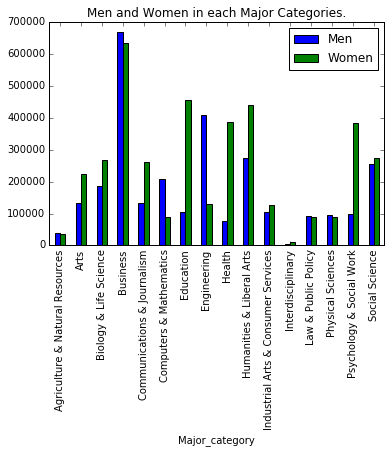

In [22]:
recent_grads.groupby('Major_category').sum().plot.bar(
    y=['Men','Women'], title="Men and Women in each Major Categories.")

### Conclusion

The number of Men and Women with Business majors are relatively the same.

Majors such as Engineering, Computers and Mathematics have higher number of Men, this is probably due to the existing notion that such courses are meant for Men.

However, majors such as Health and Arts have higher number of Women compared to men.

Generally, plots make it easier to draw comparisons and useful insights from data.